In [308]:
# usamos libreria de Algebra Linear
using LinearAlgebra

## Seteo de frecuencias características (parámetros)

In [309]:
# Definimos frecuencias caracteristicas
Δ = Float64(-1000); println("Δ = ",Δ);
Ω = Float64(100); println("Ω = ",Ω);

Δ = -1000.0
Ω = 100.0


In [310]:
# Definimos el hamiltoniano a diagonalizar
H = Matrix{Float64}(undef, 3, 3) # creamos matriz
H[:,:] = zeros(3,3)              # inicializamos matriz
H[1,1] = -Δ; H[1,2] = Ω; H[1,3] = Ω;
H[2,1] = H[1,2] ; H[3,1] = H[1,3];

In [311]:
# Mostramos en pantalla el hamiltoniano
using DelimitedFiles; writedlm(stdout, H)

1000.0	100.0	100.0
100.0	0.0	0.0
100.0	0.0	0.0


In [312]:
# calculamos las autoenergías del hamiltoniano (autovalores)
H_eigenvals = copy(eigvals(H))

3-element Vector{Float64}:
  -19.615242270663188
   -1.2480483926991165e-15
 1019.6152422706632

In [313]:
# calculamos los autoestados del hamiltonioano (autovectores)
H_eigenvectors = copy(eigvecs(H))

3×3 Matrix{Float64}:
  0.137386   2.22045e-16  -0.990518
 -0.700402  -0.707107     -0.0971462
 -0.700402   0.707107     -0.0971462

In [314]:
# Almacenamos los autoestados y autoenergías en variables (en el caso de que sean útiles después)
ϕ1 = copy(H_eigenvectors[:,1]); ϵ1= H_eigenvals[1]; # primer autoestado y autoenergía
ϕ2 = copy(H_eigenvectors[:,2]); ϵ2= H_eigenvals[2]; # segundo autoestado y autoenergía
ϕ3 = copy(H_eigenvectors[:,3]); ϵ3= H_eigenvals[3]; # tercer autoestado y autoenergía

In [315]:
# definimos el estado inicial (fundamental), estado auxiliar y estado excitado
g=[Float64(0),Float64(1),Float64(0)]; # vector columna (estado inicial)
a=[Float64(1),Float64(0),Float64(0)]; # vector columna (estado auxiliar)
e=[Float64(0),Float64(0),Float64(1)]; # vector columna (estado excitado)

# creamos vector de tiempos
# tiempo inicial, tiempo final y numero de pasos
t_start=Float64(0);t_end=Float64(1);n=Int32(1000);
# calculamos paso temporal
Δt= abs(t_end-t_start)/Float64(n-1);
# creamos vector de tiempos
time_vector = [(t_start+Δt*Float64(i-1)) for i in 1:n];

## Creamos una función de evolución
### Ecuación de schröedinger dependiente del tiempo

In [316]:
function evolution(ψ0::Array{Float64},H_eigenvals::Array{Float64},H_eigenvectors::Matrix{Float64},time_vector::Array{Float64})

    # Calculamos cuál es la descomposición del estado inicial en los autoestados del hamiltoniano
    # |ψ0⟩=(a1*|ϕ1⟩+a2*|ϕ2⟩+a3*|ϕ3⟩) := estado inicial (vector columna)

    # vector columna de coeficientes de descomposición coeff_vector := [a1,a2,a3]
    coeff_vect = inv(H_eigenvectors)*ψ0

    dim_time = length(time_vector)
    dim_eigvecs = length(H_eigenvectors[1,:])
    dim_eigvals = length(H_eigenvals)

    ψ_t = zero(Matrix{ComplexF64}(undef,dim_eigvecs,dim_time));

    for i in 1:dim_time
        for j in 1:dim_eigvecs
            for k in 1:dim_eigvals
                ψ_t[j,i]=ψ_t[j,i]+exp(-im*H_eigenvals[k]*(time_vector[i]-time_vector[1]))*H_eigenvectors[j,k]
            end
        end
    end
    return ψ_t
end

evolution (generic function with 5 methods)

## Realizamos la evolución del sistema con los parámetros específicos

In [317]:
ψ_t=evolution(g,H_eigenvals,H_eigenvectors,time_vector)

3×1000 Matrix{ComplexF64}:
  -0.853132+0.0im   -0.380507+0.847055im  …  0.265084+1.07171im
   -1.50465+0.0im    -1.45816+0.06906im      -1.19575-0.389629im
 -0.0904412+0.0im  -0.0439503+0.06906im      0.218467-0.389629im

### Calculamos la población ,$p_{e}(t)$, del estado excitado, $|e⟩$;

In [318]:
# calculamos valores útiles
dim_time = length(time_vector)
dim_eigvecs = length(H_eigenvectors[1,:])

# definimos vector de probabilidades (población del estado excitado)
pe_complex=Array{ComplexF64}(undef, dim_time);
pe=Array{Float64}(undef, dim_time);

for i in 1:dim_time
    ψ_t[:,i]=ψ_t[:,i]/norm(ψ_t[:,i]);                   # normalizamos la vector de estado
    pe_complex[i]=conj(transpose(e))*ψ_t[:,i];          # computamos ⟨e|ψt⟩
    pe_complex[i]=conj(pe_complex[i])*pe_complex[i];    # computamos ⟨ψt|e⟩⟨e|ψt⟩
    pe[i]=convert(Float64, pe_complex[i]);
end

### Ploteamos los resultados

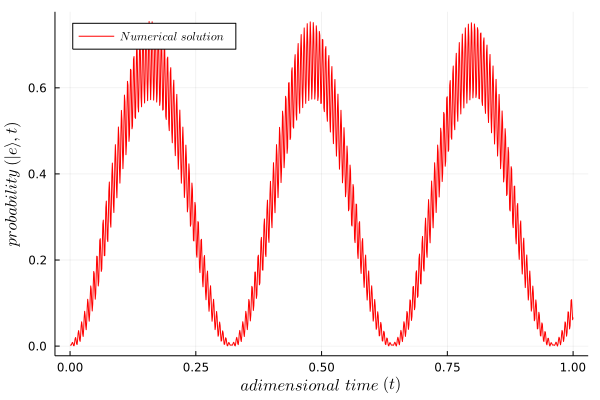

In [319]:
using Plots
plt = plot()
plot!(plt, time_vector, pe, color = :red, label = "\$Numerical\$ \$solution\$")
#scatter!(plt, time_vector, pe, color = :red, label = "")
plot!(ylabel = "\$probability\$ \$(|e⟩,t)\$", xlabel = "\$adimensional\$ \$time\$ \$(t)\$")
plot!(plt, legend = :topleft)

# Referencias

Podemos revisar un poco lo que ya está hecho en lenguaje Julia para cálculos relacionados a óptica cuántica en los siguientes enlaces:

+ [https://docs.qojulia.org/](https://docs.qojulia.org/)
+ [https://docs.qojulia.org/examples/raman/](https://docs.qojulia.org/examples/raman/)